# Test 4 SOM on Kepler and TESS Data

The fourth test done on the dataset combined with the Kepler and TESS data processed with the Min Max technique. Using the dataset by carrying out under-sampling to balance the dataset, eliminating some anomalous features and initializing the weights of the SOM with 50% composites from values ​​of Planets taken randomly, and 50% False Planets.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os

# Added paths to import modules
sys.path.insert(0, os.path.abspath('../'))

from sklearn.model_selection import train_test_split
from simple_som.som_grid_search import SOMGridSearch
from simple_som.som import SimpleSOM
from simple_som.visualization import View
from utils.color import Color
from utils.util import print_count_nan, plot_confusion_matrix
from utils.ditance_metrics import DistanceMetrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [2]:
X_train = pd.read_csv('../data/processed_data/X_kepler_tess.csv')
y_train = pd.read_csv('../data/processed_data/y_kepler_tess.csv')
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print_count_nan(data=X_train, name='X_train')
print_count_nan(data=y_train, name='y_train')
print('X Col', X_train.columns)
print('y Col', y_train.columns)

Shape of X_train: (13798, 18)
Shape of y_train: (13798, 2)
Number of not a numbers values in X_train: 0 out of 248364: 0.00%
Number of not a numbers values in y_train: 0 out of 27596: 0.00%
X Col Index(['Unnamed: 0', 'Period (days)', 'Period (days) err', 'Duration (hours)',
       'Duration (hours) err', 'Depth (ppm)', 'Depth (ppm) err',
       'Planet Radius (R_Earth) err', 'Planet Radius (R_Earth)',
       'Planet Equil Temp (K)', 'Planet Insolation (Earth Flux)', 'Planet SNR',
       'Stellar Eff Temp (K)', 'Stellar Eff Temp (K) err',
       'Stellar log(g) (cm/s^2)', 'Stellar Mass (M_Sun)',
       'Stellar Mass (M_Sun) err', 'TESS Mag'],
      dtype='object')
y Col Index(['Unnamed: 0', '0'], dtype='object')


In [3]:
X_train = X_train.drop(columns=['Unnamed: 0','Stellar Eff Temp (K)', 'Stellar Eff Temp (K) err',
                                'Stellar log(g) (cm/s^2)', 'TESS Mag'])
y_train = y_train.drop(columns='Unnamed: 0')

In [4]:
print('X Col', X_train.columns)
print('y Col', y_train.columns)

X Col Index(['Period (days)', 'Period (days) err', 'Duration (hours)',
       'Duration (hours) err', 'Depth (ppm)', 'Depth (ppm) err',
       'Planet Radius (R_Earth) err', 'Planet Radius (R_Earth)',
       'Planet Equil Temp (K)', 'Planet Insolation (Earth Flux)', 'Planet SNR',
       'Stellar Mass (M_Sun)', 'Stellar Mass (M_Sun) err'],
      dtype='object')
y Col Index(['0'], dtype='object')


In [5]:
component_names = ['Period (days)', 'Period (days) err', 'Duration (hours)',
       'Duration (hours) err', 'Depth (ppm)', 'Depth (ppm) err',
       'Planet Radius (R_Earth) err', 'Planet Radius (R_Earth)',
       'Planet Equil Temp (K)', 'Planet Insolation (Earth Flux)', 'Planet SNR',
       'Stellar Mass (M_Sun)', 'Stellar Mass (M_Sun) err']

In [6]:
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(random_state=42)
X_train, y_train = under_sampler.fit_resample(X_train, y_train)
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

Shape of X_train: (10804, 13)
Shape of y_train: (10804, 1)


In [7]:
X_train = X_train.values
y_train = y_train.values

In [8]:
TESTSET_SIZE = 0.2
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=TESTSET_SIZE, 
                                                    random_state=RANDOM_STATE, shuffle=True,
                                                    stratify=None)
print("Number of X_train: ", X_train.shape[0])
print("Number of X_test: ", X_test.shape[0])
print("Number of features: ", X_train.shape[1])

Number of X_train:  8643
Number of X_test:  2161
Number of features:  13


# Grid Search

In [9]:
param_grid = {
    'W': [None],
    'max_iter': [10000],
    'num_rows': [15, 20, 30],
    'num_cols': [15, 20, 30],
    'max_learning_rate': [0.8],
    'max_distance': [10],
    'distance_bmu': [DistanceMetrics.euclidean_distance, DistanceMetrics.manhattan_distance],
    'distance_nr': [DistanceMetrics.euclidean_distance, DistanceMetrics.manhattan_distance],
    'W_PLANET': [1],
    'W_FALSE_PLANET': [1],
    'K': [7, 11]
}

In [10]:
grid_search = SOMGridSearch(param_grid=param_grid, n_jobs=4)
best_param, best_score = grid_search.fit(X_train, y_train, X_test, y_test)

print("Best param:", best_param)
print("Best accuracy:", best_score)
#################################################################################
# Best param: {'W': None, 'max_iter': 14000, 'num_rows': 20, 'num_cols': 20,
# 'max_learning_rate': 0.8, 'max_distance': 6,
# 'distance_bmu': <function DistanceMetrics.euclidean_distance at 0x2b73046478b0>,
# 'distance_nr': <function DistanceMetrics.manhattan_distance at 0x2b7304647940>,
# 'W_PLANET': 0.9, 'W_FALSE_PLANET': 1, 'K': 11}
# Best accuracy: 0.7662817551963048
#################################################################################
# Best param: {'W': None, 'max_iter': 10000, 'num_rows': 30, 'num_cols': 30,
# 'max_learning_rate': 0.8, 'max_distance': 10,
# 'distance_bmu': <function DistanceMetrics.euclidean_distance at 0x7f7332056d40>,
# 'distance_nr': <function DistanceMetrics.euclidean_distance at 0x7f7332056d40>,
# 'W_PLANET': 1, 'W_FALSE_PLANET': 1, 'K': 11}
# Best accuracy: 0.7612216566404443

Fitting 1 folds for each of 72 candidates, totalling 72 fits
SOM training completed:  10000  | QE:    0.000005  | LR:    0.000080  | NR:    1.000000  | Time:   36.339707
SOM training completed:  10000  | QE:    0.000005  | LR:    0.000080  | NR:    1.000000  | Time:   36.741007
SOM training completed:  10000  | QE:    0.000005  | LR:    0.000080  | NR:    1.000000  | Time:   42.692605
SOM training completed:  10000  | QE:    0.000005  | LR:    0.000080  | NR:    1.000000  | Time:   43.308711
SOM training completed:  10000  | QE:    0.000010  | LR:    0.000080  | NR:    1.000000  | Time:   32.769284
SOM training completed:  10000  | QE:    0.000010  | LR:    0.000080  | NR:    1.000000  | Time:   33.487619
SOM training completed:  10000  | QE:    0.000008  | LR:    0.000080  | NR:    1.000000  | Time:   40.038123
SOM training completed:  10000  | QE:    0.000008  | LR:    0.000080  | NR:    1.000000  | Time:   40.434626
SOM training completed:  10000  | QE:    0.000004  | LR:    0.00008

In [11]:
# best_param = {}
# best_param['W'] = None
# best_param['max_iter'] = 14000
# best_param['num_rows'] = 20
# best_param['num_cols'] = 20
# best_param['max_learning_rate'] = 0.8
# best_param['max_distance'] = 10
# best_param['distance_bmu'] = DistanceMetrics.euclidean_distance
# best_param['distance_nr'] = DistanceMetrics.manhattan_distance
# best_param['W_PLANET'] = 0.9
# best_param['W_FALSE_PLANET'] = 1
# best_param['K'] = 11

In [12]:
W = best_param['W']
max_iter = 20000 # best_param['max_iter']
num_rows = best_param['num_rows']
num_cols = best_param['num_cols']
max_learning_rate = best_param['max_learning_rate']
max_distance = best_param['max_distance']
distance_bmu = best_param['distance_bmu']
distance_nr = best_param['distance_nr']
w_planet = best_param['W_PLANET']
w_false_planet = best_param['W_FALSE_PLANET']
K = best_param['K']

In [13]:
som = SimpleSOM(X_train=X_train, y_train=y_train, W=None, max_iter=max_iter, 
                num_rows=num_rows, num_cols=num_cols, max_learning_rate=max_learning_rate,
                max_distance=max_distance, distance_bmu=distance_bmu, distance_nr=distance_nr, 
                W_PLANET=w_planet, W_FALSE_PLANET=w_false_planet, K=K, n_jobs=4)
params = som.fit(X_data=X_train, verbose=2)

Iteration:  00001  | QE:    0.000001  | LR:    0.800000  | NR:   10.000000  | Time:    0.017702
Iteration:  01000  | QE:    0.000005  | LR:    0.760040  | NR:   10.000000  | Time:    9.829521
Iteration:  02000  | QE:    0.000013  | LR:    0.720040  | NR:   10.000000  | Time:   10.424376
Iteration:  03000  | QE:    0.000003  | LR:    0.680040  | NR:    9.000000  | Time:   10.945320
Iteration:  04000  | QE:    0.000002  | LR:    0.640040  | NR:    9.000000  | Time:   10.658026
Iteration:  05000  | QE:    0.000003  | LR:    0.600040  | NR:    8.000000  | Time:   10.656595
Iteration:  06000  | QE:    0.000005  | LR:    0.560040  | NR:    8.000000  | Time:   10.133028
Iteration:  07000  | QE:    0.000002  | LR:    0.520040  | NR:    7.000000  | Time:   10.319710
Iteration:  08000  | QE:    0.000001  | LR:    0.480040  | NR:    7.000000  | Time:   11.689663
Iteration:  09000  | QE:    0.000002  | LR:    0.440040  | NR:    6.000000  | Time:   13.766527
Iteration:  10000  | QE:    0.000026  | 

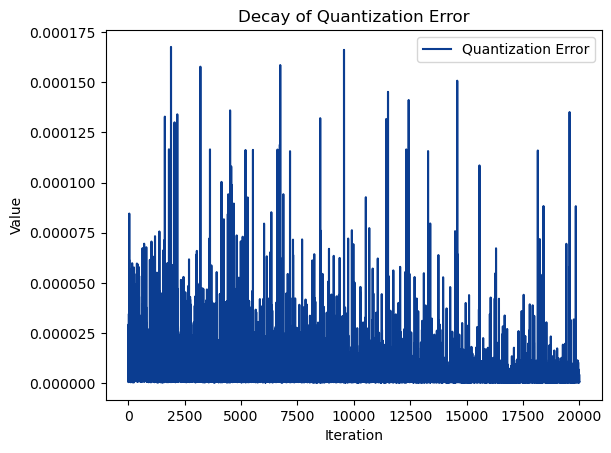

In [14]:
REDUCE = 1
plt.plot(range(max_iter//REDUCE), params['errors'][::REDUCE], 
         label='Quantization Error', color=Color.SEA.value)
plt.title('Decay of Quantization Error')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

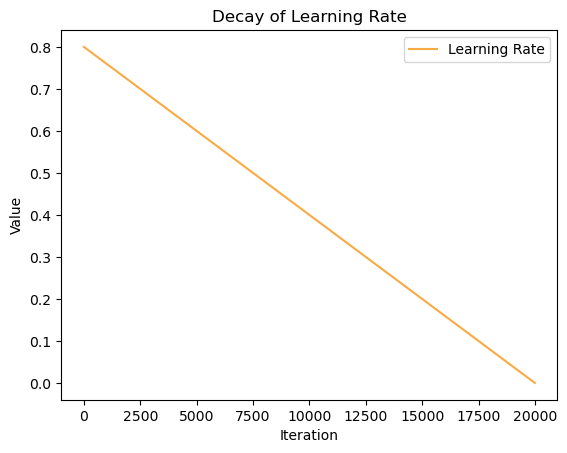

In [15]:
plt.plot(range(max_iter), params['lr'], label='Learning Rate', color=Color.SUN.value)
plt.title('Decay of Learning Rate')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

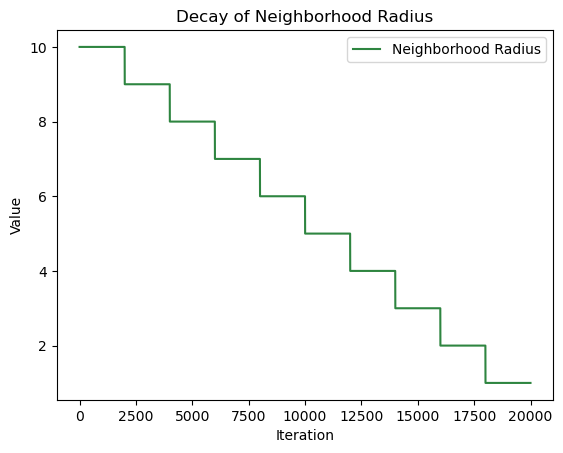

In [16]:
plt.plot(range(max_iter), params['nr'], label='Neighborhood Radius', color=Color.EARTH.value)
plt.title('Decay of Neighborhood Radius')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

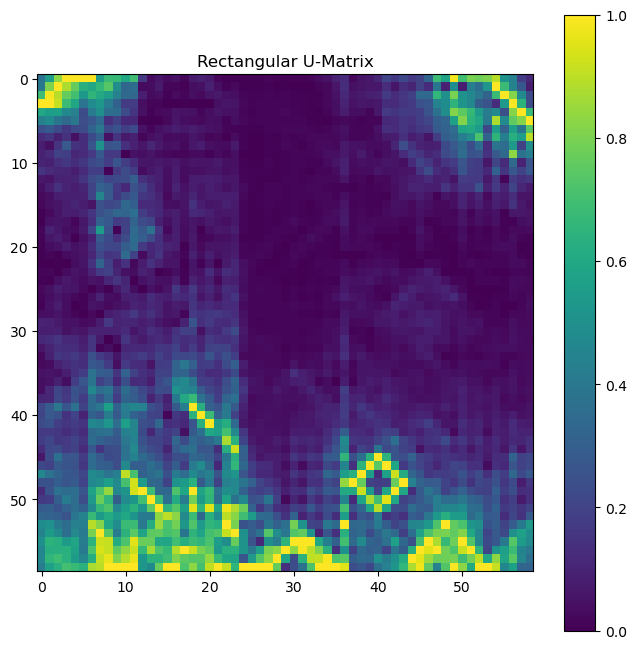

In [17]:
u_matrix_rect = View.make_u_rect(som=som)
plt.figure(figsize=(8, 8))
plt.imshow(u_matrix_rect, cmap='viridis', interpolation='none')
plt.title('Rectangular U-Matrix')
plt.colorbar()
plt.show()

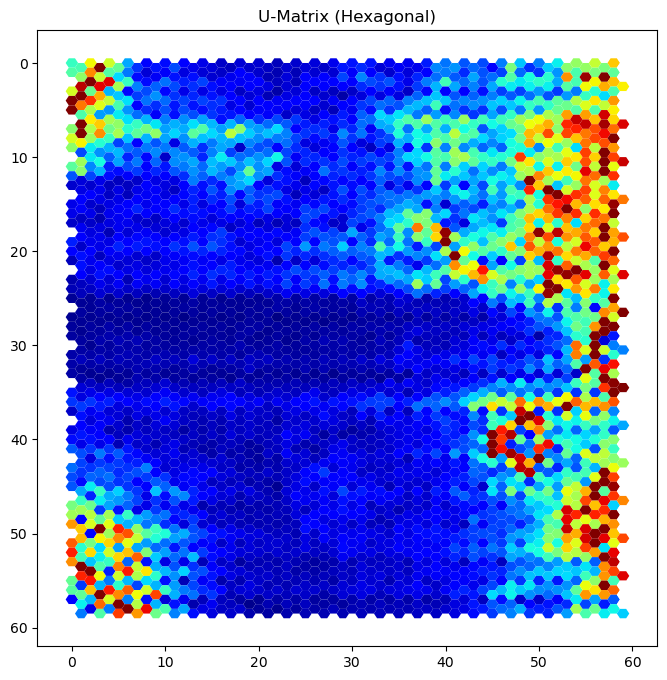

In [18]:
u_matrix_hex = View.make_u_hex(som=som)
fig, ax = plt.subplots(figsize=(8,8))
View.draw_hex_grid(som, ax, u_matrix_hex)
plt.show()

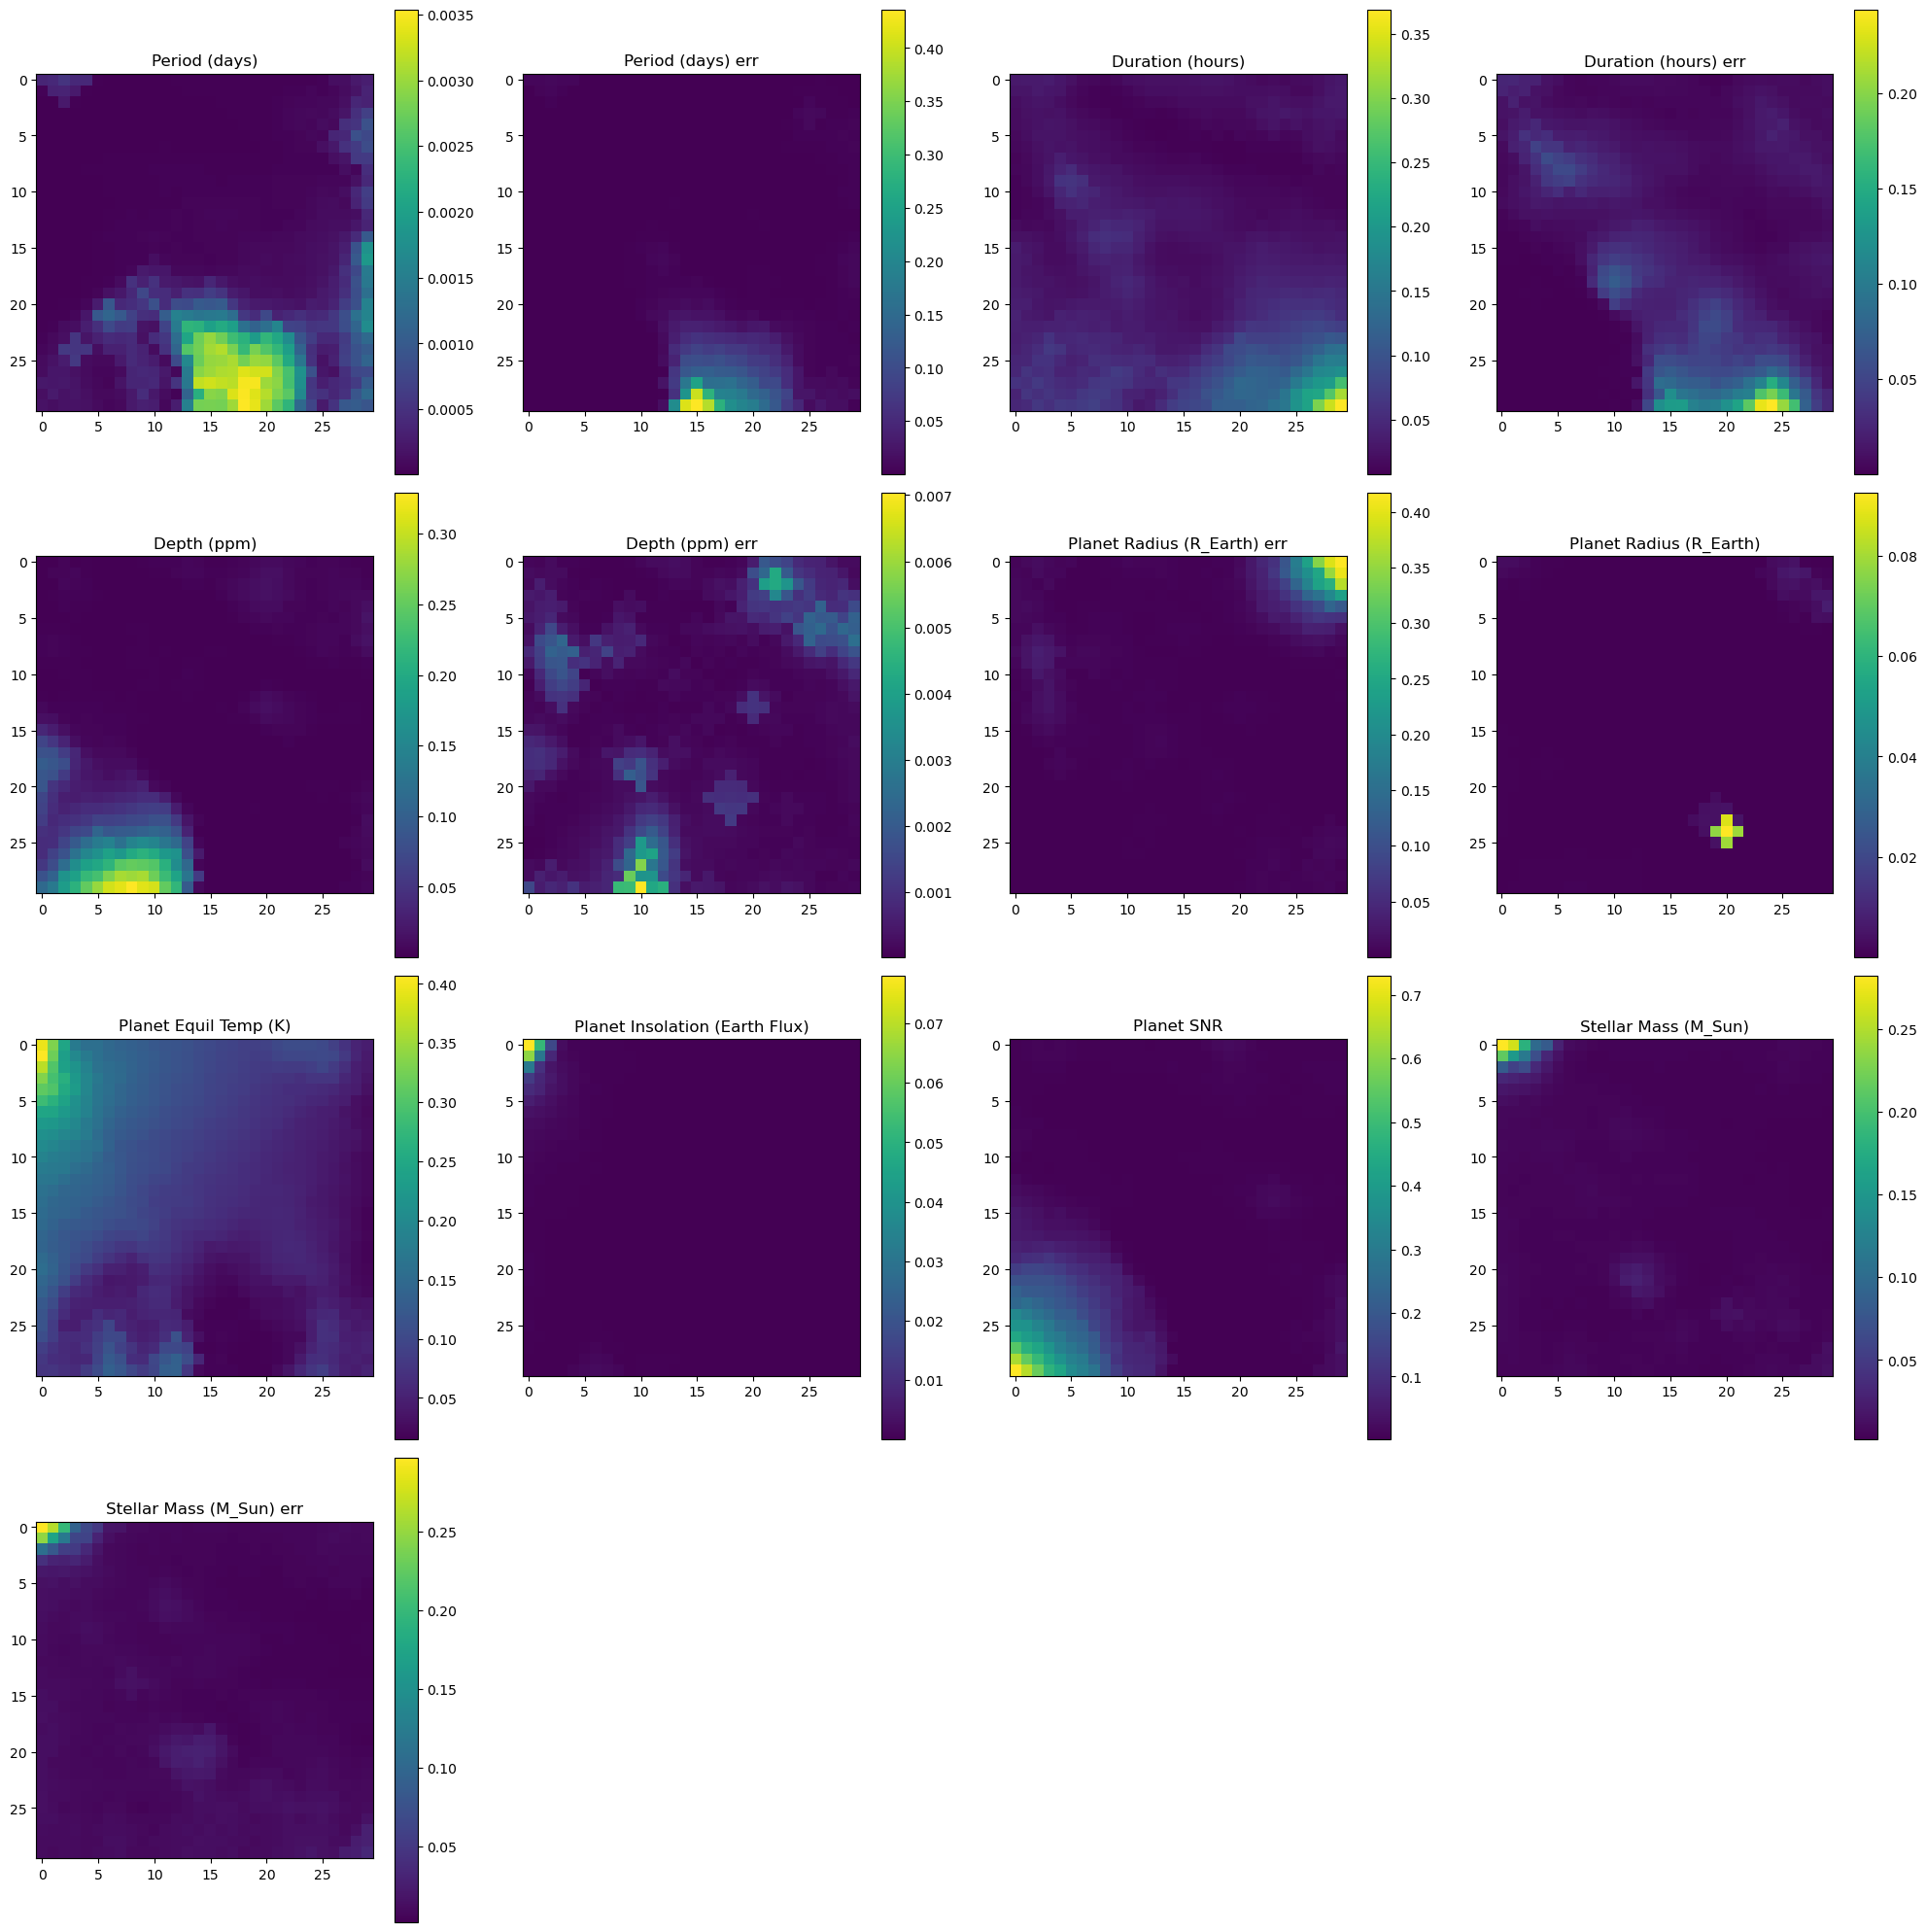

In [19]:
fig = plt.figure(figsize=(20, 20))
View.make_u_slide(component_names=component_names, som=som)
plt.show()

In [20]:
BMUs, BMU_labels = som.calculate_bmu_and_labels()
BMU_label_combinations = list(zip(BMUs, BMU_labels))
BMU_counts = som.bmu_occurrences()
coord_label = som.compute_coordinates_label()
som.print_bmu_label()

(29, 4) -> Planet:   0, False Planet:  10
(2, 7)  -> Planet:   0, False Planet:  15
(15, 26)-> Planet:  26, False Planet:   0
(3, 18) -> Planet:   6, False Planet:   0
(11, 15)-> Planet:  14, False Planet:   0
(23, 1) -> Planet:   0, False Planet:   4
(22, 4) -> Planet:   0, False Planet:   4
(15, 19)-> Planet:  30, False Planet:   0
(4, 11) -> Planet:   0, False Planet:  22
(14, 0) -> Planet:   0, False Planet:  12
(29, 29)-> Planet:   0, False Planet:  19
(19, 26)-> Planet:   0, False Planet:  30
(18, 20)-> Planet:  15, False Planet:   0
(21, 6) -> Planet:   0, False Planet:  11
(15, 6) -> Planet:   0, False Planet:  18
(26, 18)-> Planet:   7, False Planet:   0
(22, 19)-> Planet:   9, False Planet:   0
(10, 2) -> Planet:   0, False Planet:   9
(18, 10)-> Planet:  21, False Planet:   0
(10, 25)-> Planet:   0, False Planet:  17
(11, 17)-> Planet:   0, False Planet:   8
(3, 29) -> Planet:   0, False Planet:   7
(6, 16) -> Planet:   0, False Planet:  10
(7, 20) -> Planet:  11, False Plan

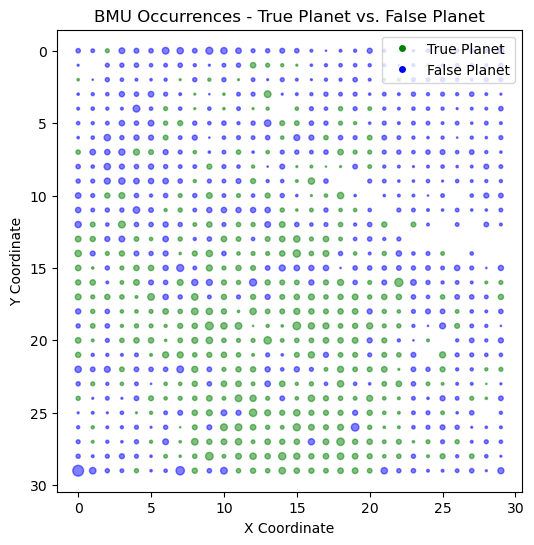

In [21]:
fig, ax = plt.subplots(figsize=(6, 6))
View.plot_bmu_occurrences_with_planet_noplanet(ax=ax, coord_label=coord_label)
plt.show()

In [22]:
map = som.collecting_labels(X_train, y_train)
label_map = som.construct_label_map(X_train, y_train)
label_map_kw = som.construct_label_map_weighed(X_train, y_train)
label_map_kcw = som.construct_label_map_occ_weighed(X_train, y_train)

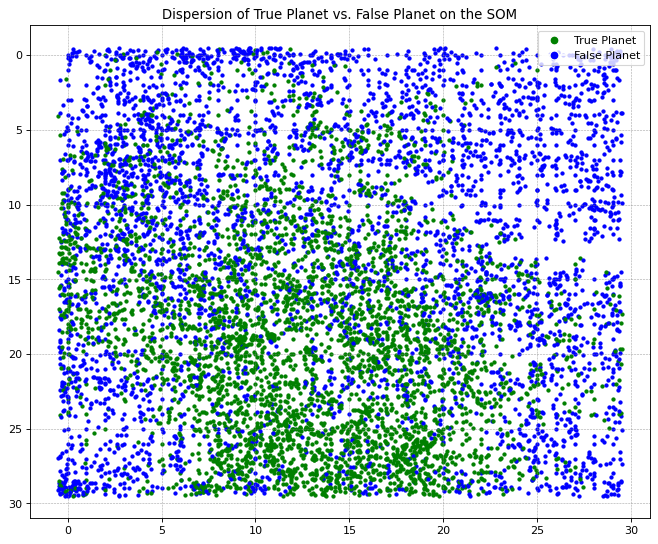

In [23]:
View.plot_dispersion_observation_on_som(X_train=X_train, BMUs=BMUs, BMU_labels=BMU_labels)

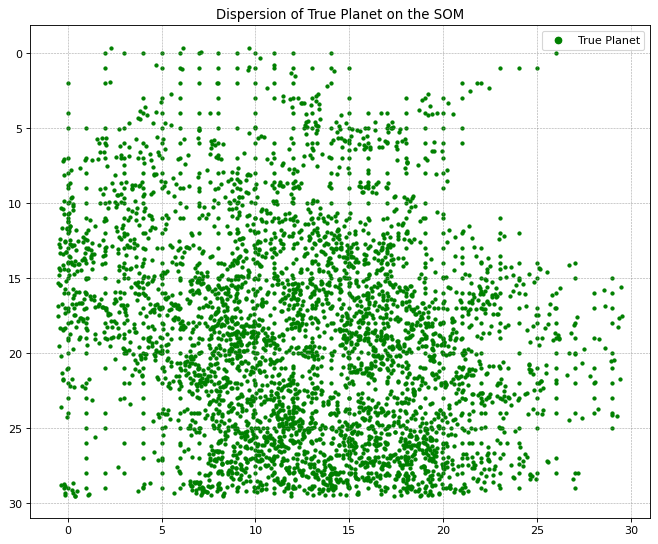

In [24]:
View.plot_class_dispersion_observation_on_som(X_train=X_train, BMUs=BMUs, 
                                              BMU_labels=BMU_labels, classes=1)

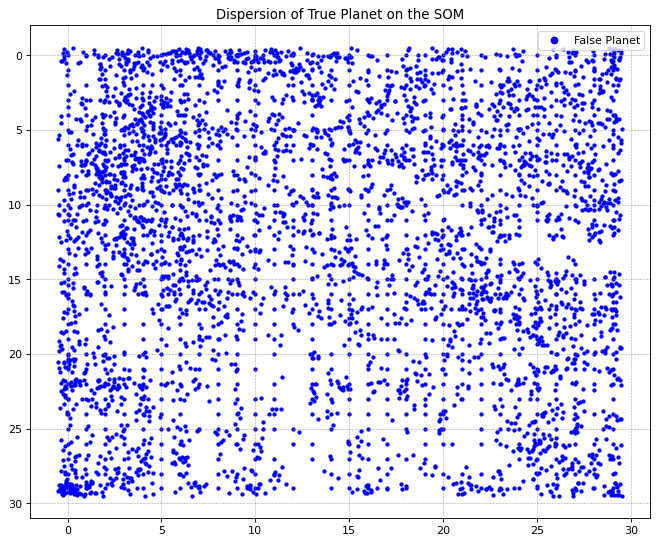

In [25]:
View.plot_class_dispersion_observation_on_som(X_train=X_train, BMUs=BMUs, 
                                              BMU_labels=BMU_labels, classes=0)

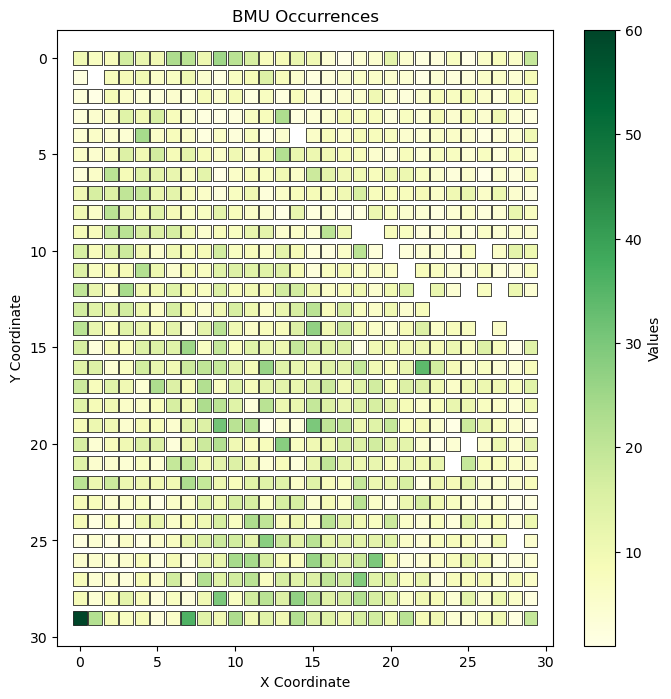

In [26]:
x_coords, y_coords, counts_occ = som.compute_occurrences_plot()

plt.figure(figsize=(8, 8))
sc = plt.scatter(x_coords, y_coords, c=counts_occ, cmap='YlGn', 
                 s=100, marker='s', edgecolors='black', linewidths=0.5)
plt.colorbar(sc, label='Values')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('BMU Occurrences')
plt.gca().invert_yaxis()
plt.show()

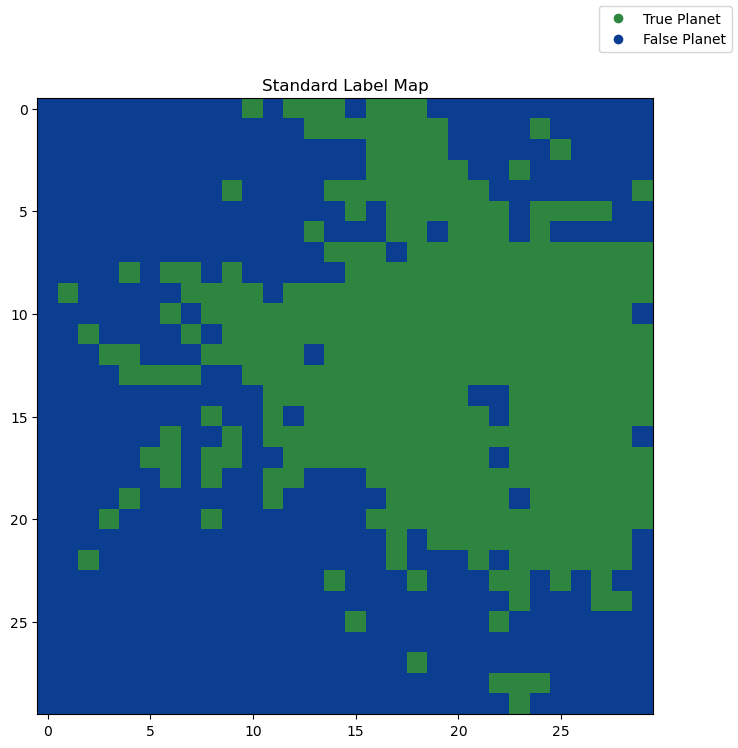

In [27]:
title = ('Standard Label Map')
View.plot_label_map(label_map=label_map, title=title)

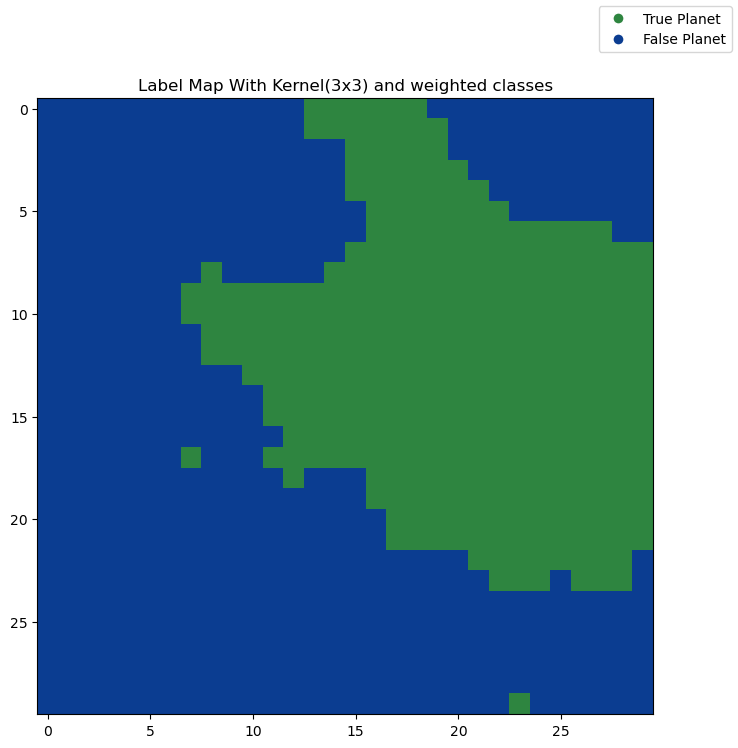

In [28]:
title = ('Label Map With Kernel(3x3) and weighted classes')
View.plot_label_map(label_map=label_map_kw, title=title)

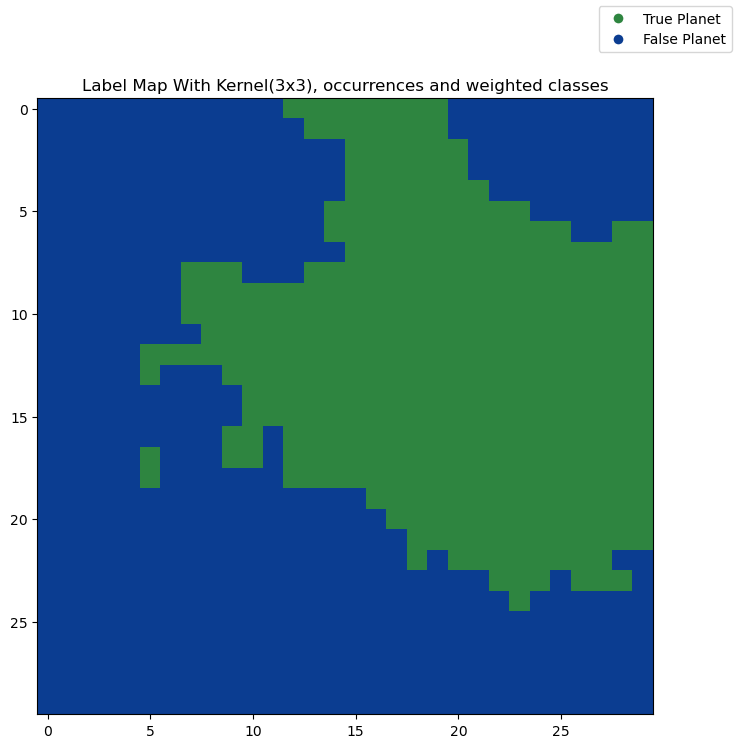

In [29]:
title = ('Label Map With Kernel(3x3), occurrences and weighted classes')
View.plot_label_map(label_map=label_map_kcw, title=title)

Accuracy: 0.7468764460897732
F1-score: 0.7440336920917174
Precision: 0.7402234636871509
Recall: 0.7478833490122295
cm:  [[819 279]
 [268 795]]


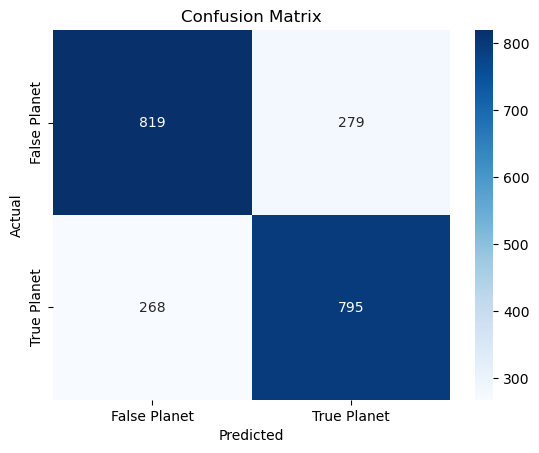

In [30]:
predicted = som.predict(X_train=X_train, y_train=y_train, X_test=X_test, K=None)

cm = confusion_matrix(y_test, predicted)
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1-score:', f1_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print("cm: ", cm)
plot_confusion_matrix(cm=cm)

Accuracy: 0.7524294308190652
F1-score: 0.7491795593061417
Precision: 0.7467289719626168
Recall: 0.7516462841015993
cm:  [[827 271]
 [264 799]]


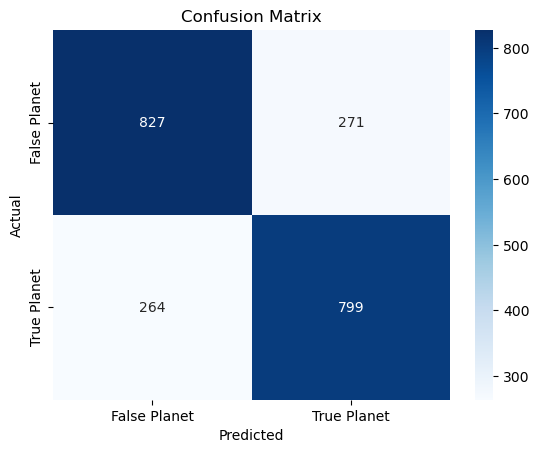

In [31]:
predicted = som.predict_kw(X_train, y_train, X_test, K=None)

cm = confusion_matrix(y_test, predicted)
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1-score:', f1_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print("cm: ", cm)
plot_confusion_matrix(cm=cm)

Accuracy: 0.7524294308190652
F1-score: 0.7531149053991694
Precision: 0.7391304347826086
Recall: 0.7676387582314205
cm:  [[810 288]
 [247 816]]


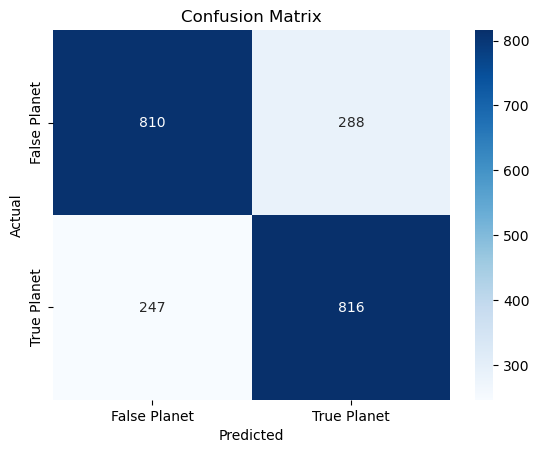

In [32]:
predicted = som.predict_kcw(X_train, y_train, X_test, K=None)

cm = confusion_matrix(y_test, predicted)
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1-score:', f1_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print("cm: ", cm)
plot_confusion_matrix(cm=cm)

Accuracy: 0.7496529384544193
F1-score: 0.7468413664014976
Precision: 0.7430167597765364
Recall: 0.7507055503292568
cm:  [[822 276]
 [265 798]]


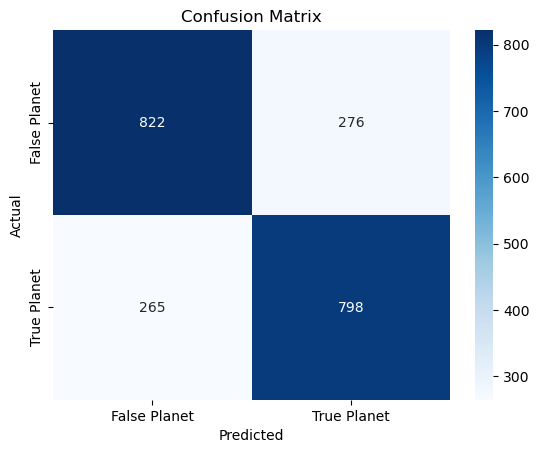

In [33]:
predicted = som.predict_knn(X_test, K=None)

cm = confusion_matrix(y_test, predicted)
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1-score:', f1_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print("cm: ", cm)
plot_confusion_matrix(cm=cm)